# Data Exploration with Data Visualization

 Lets explore various techniques for data exporation using visualization and other techniques.

## Basic Data Exploration
Use descriptive statistics and info to understand data.




In [12]:
import pandas as pd

# Lets get our house data again
!wget https://raw.githubusercontent.com/odsc2015/Data-Wrangling-With-SQL/main/kaggle-house-price-data-set.csv


# Load the dataset
house_df = pd.read_csv('kaggle-house-price-data-set.csv')

print(house_df.head())
# Get summary statistics of the data
#print(house_df.describe())
#print(house_df.info())

--2024-04-22 15:20:42--  https://raw.githubusercontent.com/odsc2015/Data-Wrangling-With-SQL/main/kaggle-house-price-data-set.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 460676 (450K) [text/plain]
Saving to: ‘kaggle-house-price-data-set.csv.1’

kaggle-house-price- 100%[===================>] 449.88K  --.-KB/s    in 0.04s   

2024-04-22 15:20:42 (12.0 MB/s) - ‘kaggle-house-price-data-set.csv.1’ saved [460676/460676]

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     95

##  Visualize with Matplotlib

Matplotlib is one of the most popular and widely-used visualization libraries in Python. It allow one to easily embedded plots into applications (GUI applications). Use it to visualize data in a clear and understandable manner with charts, plots, and figures including line plots, scatter plots, bar plots, histograms, error charts, and more.
It also give full control over plot attributes such as size, color, font, labels, etc and you can even eport visualizations in multiple formats like PNG, PDF, SVG, etc.

Frist lets list all the columns of a DataFrame in Pandas, you can utilize the .columns attribute.


In [13]:
# Listing all columns of the DataFrame
print(house_df.columns)

# Listing  columns and their respective data types
print(house_df.dtypes)

# Listing ALL columns and their respective data types
pd.set_option('display.max_rows', None)

print(house_df.dtypes)

# Reset max_rows setting to its default
pd.reset_option('display.max_rows')



Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'FstFlrSF', 'SndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

This will remove the restriction on the number of rows and columns to display, allowing you to see all the column types at once. Be careful with these settings when working with large DataFrames, as trying to display too much data at once can be crash or slow down your notebook.

Thus I used the reset_option('display.max_rows') function

## Histograms

Lets visualize some individual variables to understand their distribution.

Basic Concepts and Terminology
* Figure: The entire window or page where the plots are drawn.
* Axes: A region of the figure where the data is * plotted (essentially a plot or graph).
* Label: Text added to x and y-axis to provide context.
* Title: Heading that describes the plot.
* Legend: A guide that helps identify each data variable in the plot.


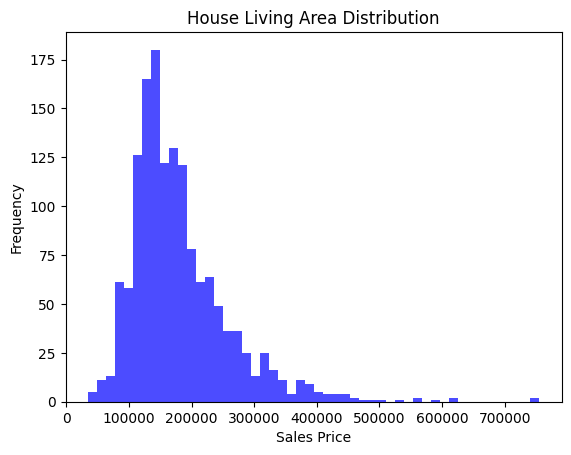

In [14]:
import matplotlib.pyplot as plt

plt.hist(house_df['SalePrice'], bins=50, alpha=0.7, color='blue')
plt.title('House Living Area Distribution')
plt.xlabel('Sales Price')
plt.ylabel('Frequency')
plt.show()

Our graph is a histogram which is a graphical representation of the distribution of a dataset. It is an estimate of the probability distribution of a continuous variable. To construct a histogram, the first step is to "bin" the range of values—that is, divide the entire range of values into a series of intervals—and then count how many values fall into each interval.

Lets review the paramaters of **plt.hist**

Parameters:
house_df['GrLivArea']: This is the data you are creating a histogram for - specifically, a column 'GrLivArea' from DataFrame house_df, which might represent the above-ground living area in square feet.

* bins=50: The bins parameter represents the number of bins (or "buckets") that the data will be split into. In this case, the entire range of 'GrLivArea' values will be divided into 100 intervals, and the histogram will show the number of data points falling into each interval. Choosing the right number of bins can help reveal the underlying shape of the data.

* alpha=0.7: The alpha parameter controls the opacity of the bars in the histogram. It takes a value between 0 (completely transparent) and 1 (completely opaque).

* color='blue': The color parameter allows you to specify the color of the bars in the histogram. It can take a string that represents a color (e.g., 'blue', 'red', 'green'), and the bars of the histogram will be rendered in that color.

There are additional parameters such as orientation, histtype, range, and more that you can try yourself.

## Drawing a Kernel Density Estimate (KDE) Line on a Histogram

Lets improve our historgra. Often a better way to visualize the distribution of a dataset using a histogram is to draw a KDE line to help show the estimated probability density function of the data.

A KDE line provides a smooth curve that helps us visualize the approximate  probability density function (PDF) of the data.  


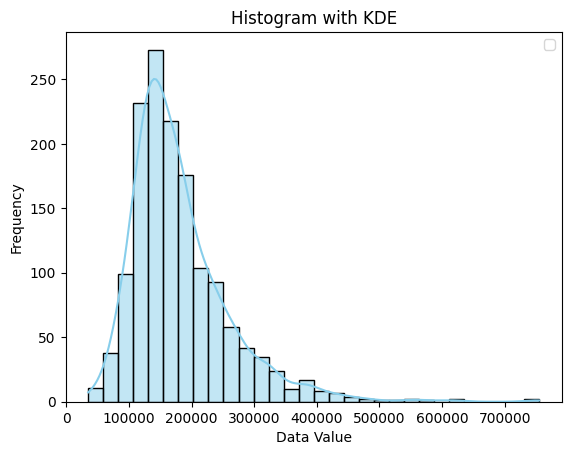

In [15]:
import seaborn as sns

# Plotting a Histogram with KDE
sns.histplot(house_df['SalePrice'], bins=30, color='skyblue', kde=True)

plt.xlabel('Data Value')
plt.ylabel('Frequency')
plt.title('Histogram with KDE')
plt.legend()
plt.show()

As you can see the KDE line helps to:

* Visualize the data distribution smoothly.
Identify modes (peaks) and understand the shape of the distribution.
* Highlight outliers or unusual data points.

Recall the PDF represents the likelihood of a continuous random variable falling within a particular range of values. Example are

* Left or Right-Skewed Distribution
* Normal (Gaussian) Distribution (symmetrical and bell-shaped with mean, median, and mode being equal)
* Exponential Distribution
* Uniform Distribution (all values have an equal chance of occurring, and the distribution is flat)

As you can see our plot is a Right-Skewed Distribution. A right-skewed distribution  suggestes that most houses are sold at a price lower than the average, with fewer houses being sold at higher prices. If the distribution was normal, we would expect the majority of houses to be sold at a price around the mean and median, which would be equal.




## Scatter Plots

Scatter plots help to visualize the relationship between two numerical variables. In this context, let's explore how to create a scatter plot to examine the relationship between house sizes and their respective prices using a hypothetical house price dataset.

### Creating a Scatter Plot: Size vs. Price

A scatter plot will allow us to visualize the relationship between house size and price - if larger homes are priced higher, if there are any outliers, etc.

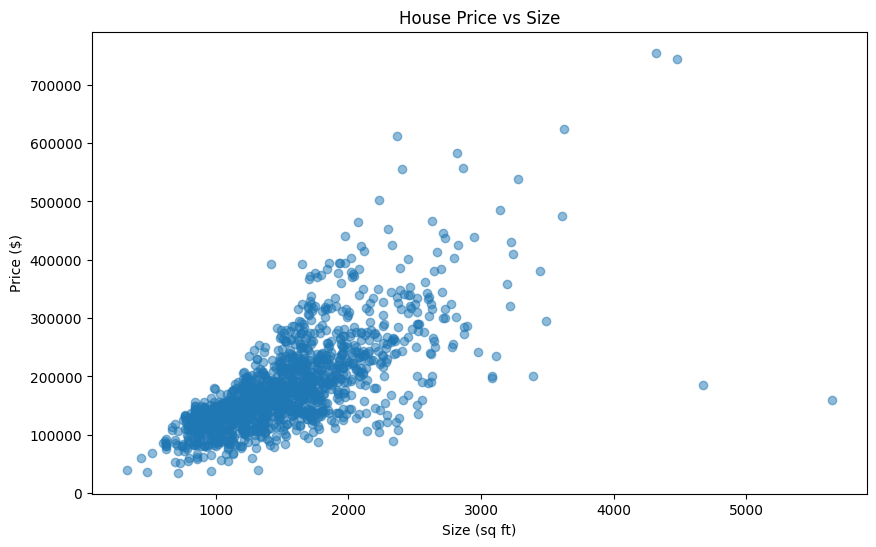

In [16]:
# Creating a scatter plot for 'Size' vs 'Price'
plt.figure(figsize=(10, 6))  # Set the size of the figure
plt.scatter(house_df['GrLivArea'], house_df['SalePrice'], alpha=0.5)  # alpha sets the transparency of the points

plt.title('House Price vs Size')
plt.xlabel('Size (sq ft)')
plt.ylabel('Price ($)')

# Display the plot
plt.show()

Recall our early data primer courses.

**Trend Observation:** Is there an observable trend? Do larger homes tend to be more expensive?

**Outliers:** Can you spot any outliers? Houses that are either too expensive for their size or too large for their price?

**Adding a Regression Line**
To analyze the trend more clearly, let’s add a simple regression line using Seaborn’s regplot. Seaborn is anohter very versatile visualizaton library

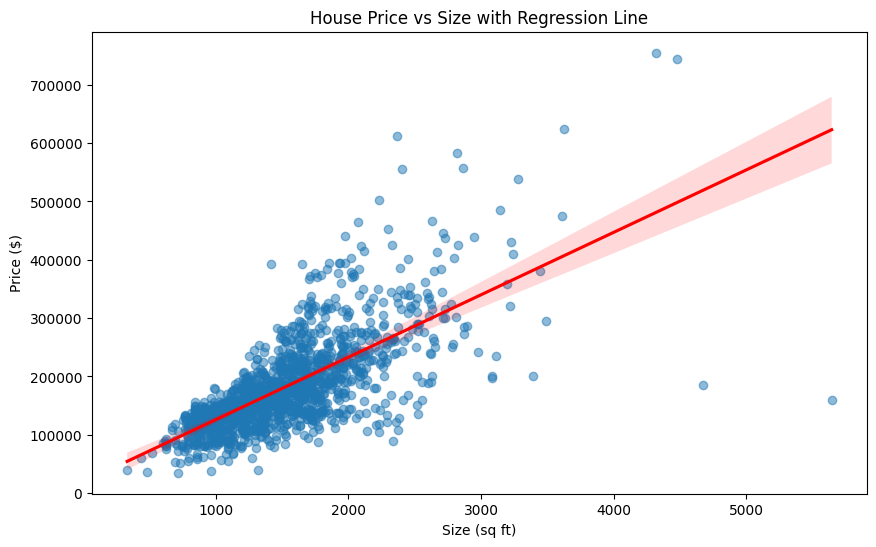

In [17]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.regplot(x='GrLivArea', y='SalePrice', data=house_df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})

plt.title('House Price vs Size with Regression Line')
plt.xlabel('Size (sq ft)')
plt.ylabel('Price ($)')

plt.show()

As you can see, scatter plots, particularly with added regression lines, provide a clear visual insight into the relationship between two numerical variables. For modeling data, understanding these relationships is crucial in feature engineering and selecting the model.

## Visualizing Categorical Data
We've visualzied numerical data but what about Categorical Data in our data set such as

Bar plots can help us understand the distribution of categorical variables like 'Neighborhood', 'HouseType', etc.

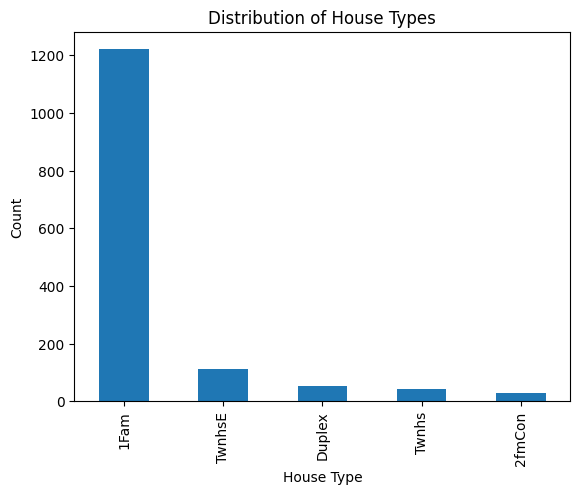

In [18]:
# Bar plot for 'Neighborhood'
house_df['BldgType'].value_counts().plot(kind='bar')
plt.title('Distribution of House Types')
plt.xlabel('House Type')
plt.ylabel('Count')

plt.show()

## Correlation
Correlation:  It's a statistical measure that reflects the linear relationship between two variables. It ranges from -1 to 1.

  -1: Represents a perfect negative correlation. As the value of one variable increases, the other variable consistently decreases in a straight line.
  
  0: Indicates no correlation. There's no linear relationship between the variables. Changes in one don't necessarily predict changes in the other.
  
  +1: Signifies a perfect positive correlation. As the value of one variable increases, the other variable consistently increases in a straight line.

Thus correlation helps you understand how two variables in your data tend to move together.


In [19]:
# Optionally convert categorical string data to category types if needed (you might skip or handle differently)
for col in house_df.select_dtypes(include=['object']).columns:
    house_df[col] = house_df[col].astype('category').cat.codes

# Assuming you have a pandas DataFrame `df` that contains your real estate data
# Compute the correlation matrix
corr_matrix = house_df.corr()

# Get the correlation values with 'SalePrice'
saleprice_corr = corr_matrix['SalePrice'].sort_values(ascending=False)

# Display the correlations
print(saleprice_corr)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
                  ...   
GarageFinish   -0.292483
HeatingQC      -0.400178
BsmtQual       -0.438881
KitchenQual    -0.589189
ExterQual      -0.636884
Name: SalePrice, Length: 81, dtype: float64



## Correlation Visual Analysis
Visualizing relationships between numerical variables, especially the target variable ('SalePrice'), and other features provides a systematic way to focus on a subset of variables that have a higher linear relationship with your target variable. This can be particularly useful in feature selection for predictiv


### 3 Correlation Disclamers!

1. Ensure that your data is cleaned and preprocessed, handling any missing values and categorical variables appropriately before computing correlation otherwise garbabe in, garbage out.
2. Correlation does not imply causation. High correlation does not mean that one variable is causing the other to change, it merely indicates that there is a relationship between the two variables.
3. It's essential to examine the nature of variables and the domain context before drawing conclusions based on correlation.

Lets use the seaborn library to create a correlation heatmap.  In a correlation heatmap, the x and y axes represent the variables being compared, and each cell in the grid represents the correlation between two variables. The color in each cell represents the strength and direction (positive/negative) of the correlation.

Lets give it a try. First some paramaters.

* annot=True: Annotates each cell with the numerical value.
* cmap="coolwarm": Color mapping. Reds indicate positive correlation, blues indicate negative.
* fmt=".2f": Format to 2 decimal places.
linewidths=.5: Spacing between cells.


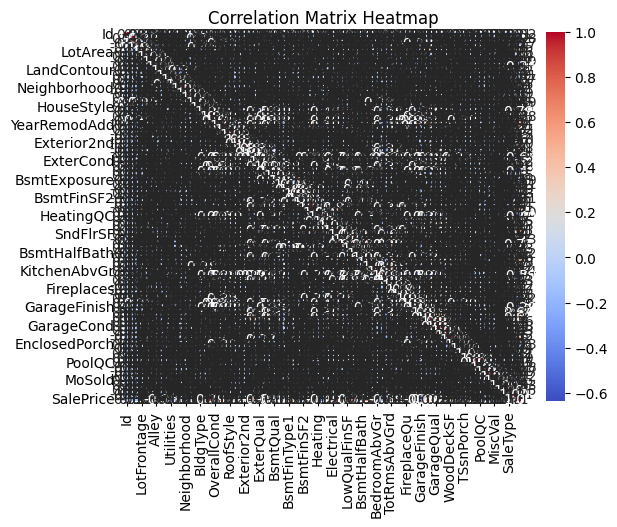

In [20]:
# Correlation Matrix Heatmap
import seaborn as sns  # Additional library for advanced visualization

correlation_matrix = house_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

Thats a bit noisy. Lets select the columns we want.  First lets find and sort the ones with the hightest correlations in our dataframe

To select the columns with the highest correlation to a particular variable (e.g., sales price) in our DataFrame, we can use the corr() function to compute the pairwise correlation of columns, followed by sorting the values.

Here's a step-by-step guide:

1. Compute Correlation
Calculate the correlation matrix and then isolate the column that represents the correlation coefficients between the target variable ('SalePrice', for instance) and all other variables.

2. Sort Values
Sort these correlation values in descending order to determine which variables have the highest positive correlation with the 'SalesPrice'.

3. Select Top-N Columns
Now, select the top N columns that you'd like to further examine. Note that 1.00 will be the first value since a variable is perfectly correlated with itself.

4. Visualizing a Heatmap for Top-N Correlated Columns
Now, let’s visualize a heatmap with these top N correlated columns.

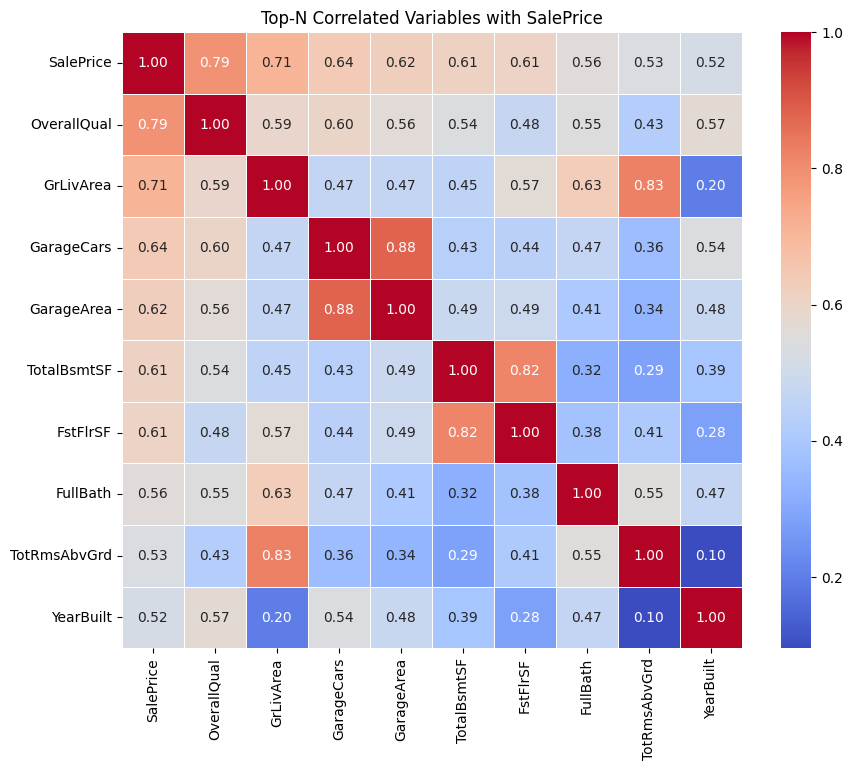

In [21]:
# Compute the correlation matrix
corr_matrix = house_df.corr()

# Obtain the correlation values with respect to 'SalesPrice'
corr_with_saleprice = corr_matrix['SalePrice']

# Sort the values
sorted_corr = corr_with_saleprice.sort_values(ascending=False)

# Select top N
top_n = sorted_corr[0:10]  # Includes the first entry (SalesPrice)

# Select data for top N
selected_columns = top_n.index
selected_data = house_df[selected_columns].copy()

# Compute correlation for top N
selected_corr = selected_data.corr()

# Visualizing the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(selected_corr, annot=True, cmap='coolwarm', linewidths=.5, fmt=".2f")
plt.title('Top-N Correlated Variables with SalePrice')

plt.show()

### Quick Exercise!
Repeat the steps with ascending=True and see what is plotted!

### Understanding the Correlation headmap

First note that the correlation values repeat diagonaly off the main diagonal (from the top-left to bottom-right).

Additional notes:

* Value Range: Correlation coefficient values range from -1 to 1.
* Positive Correlation (> 0): As Variable A increases, Variable B also increases.
* Negative Correlation (< 0): As Variable A increases, Variable B decreases.
* No Correlation (0): No linear relationship between A and B.

### Understanding the Heatmap Axes

* X and Y Axes: Variables (columns) from your dataset.
* Cells: Each cell represents a unique pair of variables.
* Diagonal: The main diagonal, from the top-left to bottom-right, typically shows a correlation of 1, because a variable is always perfectly correlated with itself. In the above example its SalePrice

### Interpreting the Heatmap

Let's assume you're looking at a heatmap based on a correlation matrix derived from a dataset that includes SalesPrice, SquareFeet, NumOfRooms, etc.

Axes Labels: These would be your variable names (e.g., SalesPrice, SquareFeet, and NumOfRooms).
Color Scale: Represents the strength and direction of correlation. A color legend (usually on the side of the heatmap) will guide you to interpret the colors (e.g., dark red might indicate a strong positive correlation, dark blue a strong negative correlation, and light colors weak correlations).
Example Scenario
Cell [SalesPrice, SquareFeet]: Shows the correlation between the sales price and square footage of homes. A strong positive correlation (e.g., 0.8) would mean that as the square footage of a home increases, the sales price also tends to increase.
Cell [SalesPrice, NumOfRooms]: If this shows a weak correlation (e.g., 0.2), it means the number of rooms has a weaker linear relationship with the sales price compared to square footage.

# Exercies


## Exercise 1: Creating a Scatter Plot

Use the following code to get data to create a house_df dataframe

    house_data = pd.read_csv('https://raw.githubusercontent.com/odsc2015/Data-Wrangling-With-SQL/main/kaggle-house-price-data-set.csv')


The DataFrame house_df contains data about the house lot area (land plot) and their respective prices. Your task is to create a scatter plot to visualize the relationship between house size (LotArea) and price (SalePrice).

What does this scatterploat tell you abuot the relationship between LotArea and SalePrice ?